# Loan Program

## By Maduako Akachi

This is a classification problem in which we need to classify whether the loan will be approved or not. classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load and read the dataset into panda dataframe
#Read first rows
loan_df = pd.read_csv("../input/loan-data/train.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Get size of the dataframe
loan_df.shape

(614, 13)

In [4]:
#Get more information about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Get statistical information about the dataframe
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Check for missing values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Fill up categorical null values with mode
mode = loan_df.filter(['Gender', 'Married', 'Dependents', 'Self_Employed']).mode()
print (mode)
cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
loan_df[cols]=loan_df[cols].fillna(mode.iloc[0])

  Gender Married Dependents Self_Employed
0   Male     Yes          0            No


In [8]:
#Fill up numerical null values with mean
cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
loan_df[cols] = loan_df[cols].fillna(loan_df[cols].mean())

In [9]:
#Drop irrelevant columns
loan_df.drop(['Loan_ID', 'Dependents'], axis=1, inplace=True)

In [10]:
#Check for missing values
loan_df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#Visualization 
def bar_chart(col): 
    Approved = loan_df[loan_df["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = loan_df[loan_df["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

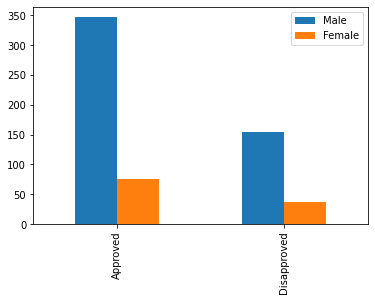

In [12]:
bar_chart("Gender")

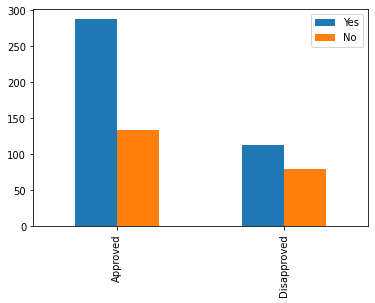

In [13]:
bar_chart("Married")

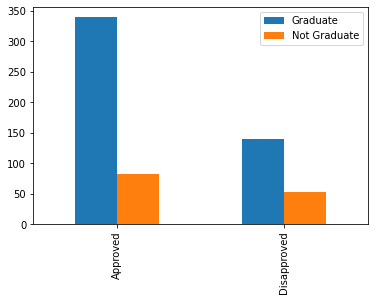

In [14]:
bar_chart("Education")

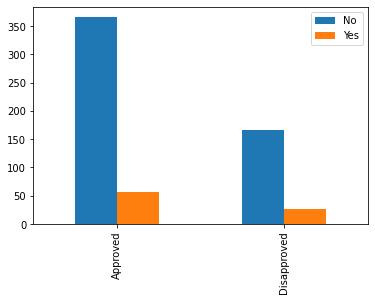

In [15]:
bar_chart("Self_Employed")

In [16]:
#Get more information about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [17]:
#Label Encoding
from sklearn import preprocessing

category_col = [ 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' ]
labelEncoder = preprocessing.LabelEncoder()
 
mapping_dict = {}
for col in category_col:
    loan_df[col] = labelEncoder.fit_transform(loan_df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'Gender': {'Female': 0, 'Male': 1}, 'Married': {'No': 0, 'Yes': 1}, 'Education': {'Graduate': 0, 'Not Graduate': 1}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Loan_Status': {'N': 0, 'Y': 1}}


In [18]:
#Get more information about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


In [19]:
#Define dependent and independent variables and then split the data into train and test
from sklearn.model_selection import train_test_split  
X = loan_df.drop("Loan_Status", axis=1) 
y = loan_df["Loan_Status"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(429, 10)
(429,)
(185, 10)
(185,)


In [20]:
#Build model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [21]:
#Get best parameters to use in building model
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [22]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [23]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 50}


0.82 + or -0.012 for the {'max_depth': 2, 'n_estimators': 5}
0.785 + or -0.054 for the {'max_depth': 2, 'n_estimators': 10}
0.818 + or -0.015 for the {'max_depth': 2, 'n_estimators': 50}
0.818 + or -0.015 for the {'max_depth': 2, 'n_estimators': 100}
0.818 + or -0.015 for the {'max_depth': 2, 'n_estimators': 250}
0.813 + or -0.017 for the {'max_depth': 4, 'n_estimators': 5}
0.804 + or -0.012 for the {'max_depth': 4, 'n_estimators': 10}
0.818 + or -0.018 for the {'max_depth': 4, 'n_estimators': 50}
0.818 + or -0.018 for the {'max_depth': 4, 'n_estimators': 100}
0.816 + or -0.019 for the {'max_depth': 4, 'n_estimators': 250}
0.788 + or -0.036 for the {'max_depth': 8, 'n_estimators': 5}
0.809 + or -0.016 for the {'max_depth': 8, 'n_estimators': 10}
0.823 + or -0.016 for the {'max_depth': 8, 'n_estimators': 50}
0.813 + or -0.017 for the {'max_depth': 8, 'n_estimators': 100}
0.816 + or -0.019 for the {'max_depth': 8, 'n_estimators'

In [24]:
#create the model
from sklearn.ensemble import RandomForestClassifier

rf1=RandomForestClassifier(n_estimators= 50, max_depth=4)

In [25]:
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [26]:
prediction_rf=rf1.predict(X_test)

In [27]:
rf_score=rf1.score(X_test,y_test)*100

In [28]:
rf_score

78.37837837837837

In [29]:
# Importing class and libraries for SVM

from sklearn.svm import SVC
model = SVC()

In [30]:
# Training the Model

model.fit(X_train,y_train)

SVC()

In [31]:
# Accuracy of the model in training

model.score(X_train,y_train)

0.7016317016317016

In [32]:
# Accuracy of the model in Testing

model.score(X_train,y_train)

0.7016317016317016

In [33]:
# Importing Libraries and Classes

from sklearn import metrics

In [34]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model.predict(X_test)

In [35]:
# Obtaining Classification Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.50      0.02      0.03        61
           1       0.67      0.99      0.80       124

    accuracy                           0.67       185
   macro avg       0.59      0.50      0.42       185
weighted avg       0.62      0.67      0.55       185



In [36]:
# Output in the form of count

print(metrics.confusion_matrix(expected, predicted))

[[  1  60]
 [  1 123]]


In [37]:
import joblib 
joblib.dump(rf1, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])